<a href="https://colab.research.google.com/github/elimeyer1/ML_4105/blob/main/HW4_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.svm import SVR
import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score
import random
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
file_path = '/content/drive/My Drive/4105/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [207]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def redefine(x):
    return x.map({'yes': 1, 'no': 0})

In [208]:
housing[varlist] = housing[varlist].apply(redefine)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [209]:
x = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = housing['price']

In [210]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
46,6000,3,2,4,1,0,0,0,1,1,0
93,7200,3,2,1,1,0,1,0,1,3,0
335,3816,2,1,1,1,0,1,0,1,2,0
412,2610,3,1,2,1,0,1,0,0,0,1
471,3750,3,1,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,0
106,5450,4,2,1,1,0,1,0,1,0,1
270,4500,3,2,3,1,0,0,1,0,1,0
435,4040,2,1,1,1,0,0,0,0,0,0


In [211]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [212]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_kernel = None
best_score = float('inf')


In [213]:
for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(x_train, y_train)
    y_pred = svr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_kernel = kernel


In [214]:
print(f"Best kernel: {best_kernel}")
print(f"Mean Squared Error: {best_score}")

Best kernel: linear
Mean Squared Error: 5565648082359.89


In [215]:
svr = SVR(kernel=best_kernel)
svr.fit(x_train, y_train)

SVR(kernel='linear')

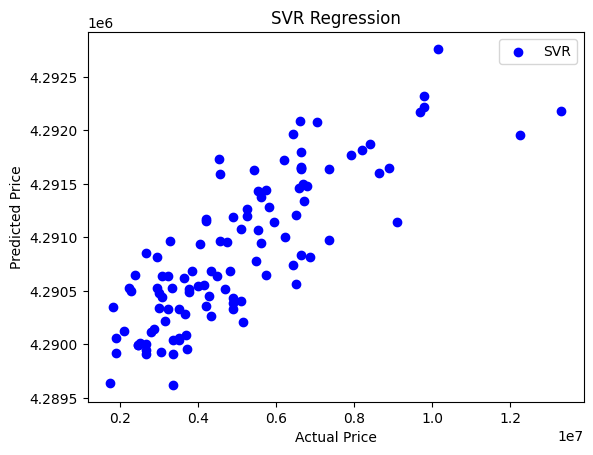

In [216]:
plt.scatter(y_test, svr.predict(x_test), c='b', label='SVR')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("SVR Regression")
plt.legend()
plt.show()

In [217]:
pca = PCA()
X_train_pca = pca.fit_transform(x_train)

Optimal number of principal components: 10
